In [1]:
import pickle

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import numpy as np
from uncertainties import unumpy, ufloat


In [2]:
data = pickle.load(open('output/plot_data.pkl', 'rb'))
hist_settings = pickle.load(open('output/hist_settings.pkl', 'rb'))

In [3]:
output_dir = 'output/'

feature_list = ['HT', 'mass_jet', 'n_jet', 'n_bjet']
background_plot_list = ['W', 'DY', 'ttbar']

plot_size = 2.5

color_dict = {}
color_dict['W']='tab:blue'
color_dict['DY']='tab:green'
color_dict['ttbar']='tab:red'
color_dict['data']='tab:purple'

label_dict = {}
label_dict['W'] = r'$W$ + Jets $\rightarrow l\nu$'
label_dict['DY'] = r'$Z/\gamma^*$ + Jets $\rightarrow ll$'
label_dict['ttbar'] = r'$t\bar{t}$'

all_log = True

n_features = len(feature_list)

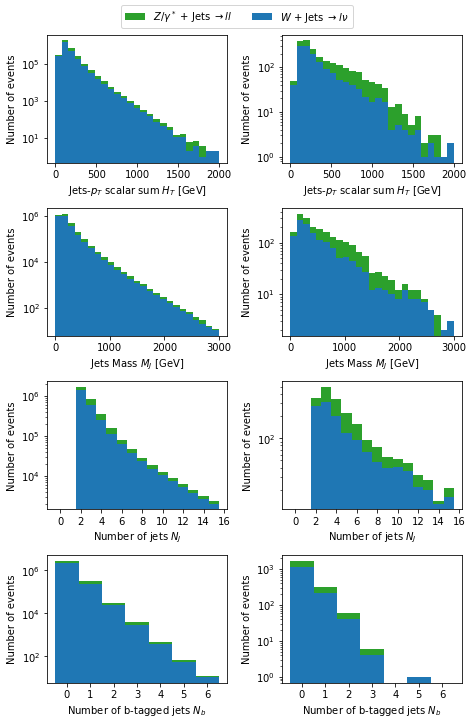

In [4]:
fig, ax_arr = plt.subplots(n_features, 2, figsize=(2 * 1.3 * plot_size, n_features * plot_size))

for col, feature in enumerate(feature_list):
    f_setting = hist_settings[feature]
    for row, cut in enumerate(['pre-', 'pre-anoscore']):
        ax = ax_arr[col, row]
        
        # plot background stacked
        x_list = []
        bin_edges = None
        weights_list = []
        color_list = []
        label_list = []
        for proc in ['W', 'DY']:
            hist = data[cut][proc]
            bin_edges = hist[feature].bin_edges
            x_list.append(hist[feature].bin_edges[:-1])
            weights_list.append(hist[feature].bin_content)
            color_list.append(color_dict[proc])
            label_list.append(label_dict[proc])
            
        ax.hist(x_list, bin_edges, weights=weights_list, 
                stacked=True, histtype='stepfilled', color=color_list, label=label_list)#, density=True)
        
        # axis settings
        ax.set_xlabel(f_setting['symbol'])
        ax.set_ylabel('Number of events')
        
        if f_setting['int']:
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            
        if all_log:
            ax.set_yscale('log')
        else:
            ax.set_yscale(f_setting['yscale'])
        
handles, labels = ax_arr[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc = 'upper center', ncol=4)

plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0, rect=(0,0,1,0.96))
plt.savefig(output_dir + '/mc_b.pdf')
plt.show()

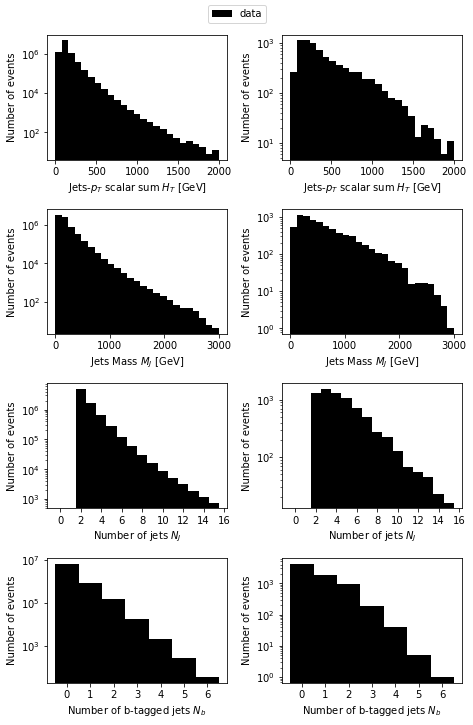

In [5]:
fig, ax_arr = plt.subplots(n_features, 2, figsize=(2 * 1.3 * plot_size, n_features * plot_size))

for col, feature in enumerate(feature_list):
    f_setting = hist_settings[feature]
    for row, cut in enumerate(['pre-', 'pre-anoscore']):
        ax = ax_arr[col, row]
        
        # plot data
        hist_data_f = data[cut]['data'][feature]
        bin_edges = hist_data_f.bin_edges
        bin_content = hist_data_f.bin_content
        ax.hist(bin_edges[:-1], bin_edges, weights=bin_content, 
                histtype='stepfilled', color='black', label='data')#, density=True)
        
        # axis settings
        ax.set_xlabel(f_setting['symbol'])
        ax.set_ylabel('Number of events')
        
        if f_setting['int']:
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            
        if all_log:
            ax.set_yscale('log')
        else:
            ax.set_yscale(f_setting['yscale'])

handles, labels = ax_arr[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc = 'upper center', ncol=4)

plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0, rect=(0,0,1,0.96))
plt.savefig(output_dir + '/data.pdf')
plt.show()

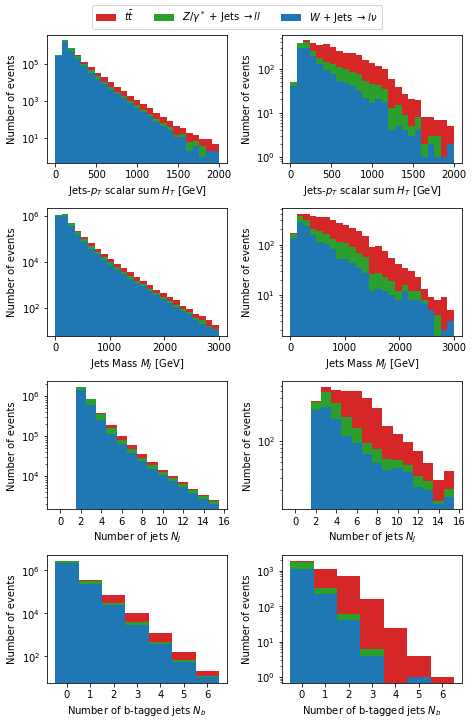

In [6]:
fig, ax_arr = plt.subplots(n_features, 2, figsize=(2 * 1.3 * plot_size, n_features * plot_size))

for col, feature in enumerate(feature_list):
    f_setting = hist_settings[feature]
    for row, cut in enumerate(['pre-', 'pre-anoscore']):
        ax = ax_arr[col, row]
        
        # plot background stacked
        x_list = []
        bin_edges = None
        weights_list = []
        color_list = []
        label_list = []
        for proc in ['W', 'DY', 'ttbar']:
            hist = data[cut][proc]
            bin_edges = hist[feature].bin_edges
            x_list.append(hist[feature].bin_edges[:-1])
            weights_list.append(hist[feature].bin_content)
            color_list.append(color_dict[proc])
            label_list.append(label_dict[proc])
            
        ax.hist(x_list, bin_edges, weights=weights_list, 
                stacked=True, histtype='stepfilled', color=color_list, label=label_list)#, density=True)
        
        # axis settings
        ax.set_xlabel(f_setting['symbol'])
        ax.set_ylabel('Number of events')
        
        if f_setting['int']:
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            
        if all_log:
            ax.set_yscale('log')
        else:
            ax.set_yscale(f_setting['yscale'])
        
handles, labels = ax_arr[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc = 'upper center', ncol=4)

plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0, rect=(0,0,1,0.96))
plt.savefig(output_dir + '/mc_tt.pdf')
plt.show()


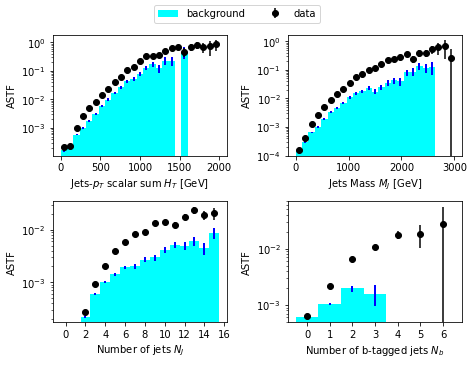

In [7]:
fig, ax_arr = plt.subplots(2, n_features//2, figsize=(2 * 1.3 * plot_size, 2* plot_size))

for col, feature in enumerate(feature_list):
    ax = ax_arr[col//2, col%2]
    f_setting = hist_settings[feature]
    
    # plot background
    bin_content_pre = data['pre-']['b'][feature].bin_content + 1e-20
    bin_content_ano = data['pre-anoscore']['b'][feature].bin_content
    bin_content_pre = unumpy.uarray(bin_content_pre, np.sqrt(bin_content_pre))
    bin_content_ano = unumpy.uarray(bin_content_ano, np.sqrt(bin_content_ano))
    
    astf_b = bin_content_ano / bin_content_pre
    astf_b[unumpy.std_devs(astf_b)/(unumpy.nominal_values(astf_b)+1e-20)>0.5] = ufloat(0, 0)
    bin_edges = data['pre-']['data'][feature].bin_edges
    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
    
    ax.hist(bin_edges[:-1], bin_edges, weights = unumpy.nominal_values(astf_b), histtype='stepfilled',# density=True,
            label='background', color='cyan')
    
    ax.errorbar(bin_centers, unumpy.nominal_values(astf_b), yerr=unumpy.std_devs(astf_b), 
                fmt='', linestyle='', color='blue', elinewidth=2)

    # plot background + signal
    # bin_content_pre = data['pre-']['bs'][feature].bin_content + 1e-20
    # bin_content_ano = data['pre-anoscore']['bs'][feature].bin_content
    # bin_content_pre = unumpy.uarray(bin_content_pre, np.sqrt(bin_content_pre))
    # bin_content_ano = unumpy.uarray(bin_content_ano, np.sqrt(bin_content_ano))
    # 
    # adse = bin_content_ano / bin_content_pre
    # adse[unumpy.std_devs(adse)/(unumpy.nominal_values(adse)+1e-20)>0.5] = ufloat(0, 0)
    # bin_edges = data['pre-']['data'][feature].bin_edges
    # bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
    # 
    # ax.hist(bin_edges[:-1], bin_edges, weights = unumpy.nominal_values(adse), histtype='step',# density=True,
    #         label='background + signal', color='red')
    
    # plot data
    bin_content_pre = data['pre-']['data'][feature].bin_content + 1e-20
    bin_content_ano = data['pre-anoscore']['data'][feature].bin_content
    bin_content_pre = unumpy.uarray(bin_content_pre, np.sqrt(bin_content_pre))
    bin_content_ano = unumpy.uarray(bin_content_ano, np.sqrt(bin_content_ano))
    
    astf_data = bin_content_ano / bin_content_pre
    
    bin_edges = data['pre-']['data'][feature].bin_edges
    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
    
    ax.errorbar(bin_centers, unumpy.nominal_values(astf_data), yerr=unumpy.std_devs(astf_data), 
                fmt='o', color='black', label='data')
    
    # axis settings
    ax.set_yscale('log') 
    
    if f_setting['int']:
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        
    ax.set_xlabel(f_setting['symbol'])
    ax.set_ylabel('ASTF')

handles, labels = ax_arr[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc = 'upper center', ncol=2)

plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0, rect=(0,0,1,0.92))
plt.savefig(output_dir + '/astf.pdf')
plt.show()


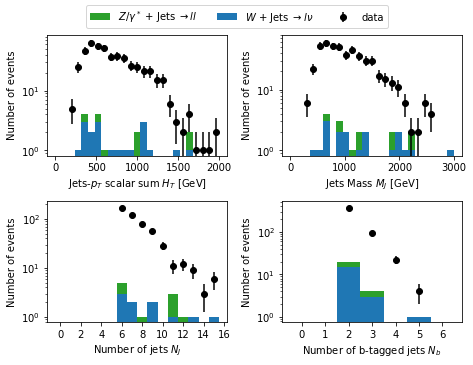

In [8]:
fig, ax_arr = plt.subplots(2, n_features//2, figsize=(2 * 1.3 * plot_size, 2* plot_size))

cut = 'pre-ano_q_bs-pos'
for col, feature in enumerate(feature_list):
    ax = ax_arr[col//2, col%2]
    f_setting = hist_settings[feature]
    
    # plot background stacked
    x_list = []
    bin_edges = None
    weights_list = []
    color_list = []
    label_list = []
    
    for proc in ['W', 'DY']:
        hist = data[cut][proc]
        bin_edges = hist[feature].bin_edges
        x_list.append(hist[feature].bin_edges[:-1])
        weights_list.append(hist[feature].bin_content)
        color_list.append(color_dict[proc])
        label_list.append(label_dict[proc])
    
    ax.hist(x_list, bin_edges, weights=weights_list, 
            stacked=True, histtype='stepfilled', color=color_list, label=label_list)#, density=True)
    
    hist_data_f = data[cut]['data'][feature]
    bin_edges = hist_data_f.bin_edges
    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
    bin_content = hist_data_f.bin_content
    
    ax.errorbar(bin_centers, bin_content, yerr=np.sqrt(bin_content), 
                fmt='o', color='black', label='data')
    
    # axis settings
    if all_log:
        ax.set_yscale('log')
    else:
        ax.set_yscale(f_setting['yscale'])
    
    if f_setting['int']:
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        
    ax.set_xlabel(f_setting['symbol'])
    ax.set_ylabel('Number of events')

handles, labels = ax_arr[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc = 'upper center', ncol=3)

plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0, rect=(0,0,1,0.92))
plt.savefig(output_dir + '/post_b.pdf')
plt.show()



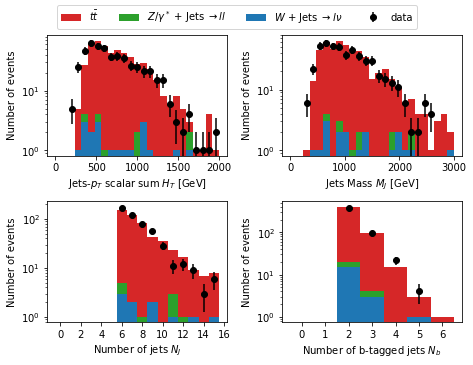

In [9]:
fig, ax_arr = plt.subplots(2, n_features//2, figsize=(2 * 1.3 * plot_size, 2* plot_size))

cut = 'pre-ano_q_bs-pos'
for col, feature in enumerate(feature_list):
    ax = ax_arr[col//2, col%2]
    f_setting = hist_settings[feature]
    
    # plot background stacked
    x_list = []
    bin_edges = None
    weights_list = []
    color_list = []
    label_list = []
    
    for proc in ['W', 'DY', 'ttbar']:
        hist = data[cut][proc]
        bin_edges = hist[feature].bin_edges
        x_list.append(hist[feature].bin_edges[:-1])
        weights_list.append(hist[feature].bin_content)
        color_list.append(color_dict[proc])
        label_list.append(label_dict[proc])
    
    ax.hist(x_list, bin_edges, weights=weights_list, 
            stacked=True, histtype='stepfilled', color=color_list, label=label_list)#, density=True)
    
    hist_data_f = data[cut]['data'][feature]
    bin_edges = hist_data_f.bin_edges
    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
    bin_content = hist_data_f.bin_content
    
    ax.errorbar(bin_centers, bin_content, yerr=np.sqrt(bin_content), 
                fmt='o', color='black', label='data')
    
    # axis settings
    if all_log:
        ax.set_yscale('log')
    else:
        ax.set_yscale(f_setting['yscale'])
        
    
    if f_setting['int']:
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        
    ax.set_xlabel(f_setting['symbol'])
    ax.set_ylabel('Number of events')

handles, labels = ax_arr[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc = 'upper center', ncol=4)

plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0, rect=(0,0,1,0.92))
plt.savefig(output_dir + '/post_tt.pdf')
plt.show()


